## Workgroup 3
### Group: 1
### Members: 
- Juan José Tang
- Ursula Cotrina
- Victoria Olivera

## 1. Multiconilearity

### 1.1 What is Multiconilearity?

Multicollinearity refers to the situation in which, under a econometric model, there are two or more regressors (also called independent variables) that are correlated in some degree. Usually, in the literature, this problem is separated in:

+ *Perfect multicollinearity:* a problem that implies the matrix (X'X) not being invertible, as it does not have complete rank anymore. This problem arises when at least one regressor is a linear combination of other regressor(s).

+ *Imperfect multicollinearity:* appears when there is a high correlation, altough not perfectly linear, between regressors. The OLS method can still be applied, and the coefficients can be calculated. Nevertheless, the variance of these estimators will increase as the correlation increases, leading to lower t-statistics, and hence a higher probability of not rejecting the null hypothesis H0, even though the variable could be relevant.

To see this, consider the following model:

$$Y_i = \beta_1 + \beta_2 W_{2i} + ... + \beta_{k-1}W_{(k-1)i} + \beta_z Z_i + \mu_i$$

Where the correlation between Z and variables W is high. We want to prove that the variance of the estimator $\beta_z$ increases as the correlation between the W's and Z increases. Let us put the presented model in matrix form, as:

$$y =  W\beta + Z \beta_z + \mu$$

Where W is the matrix of variables $W_j$ and the column of 1's. Z is the column vector of variables $Z_i$. Applying the Frisch-Waugh Theorem and partial regressions, we know that:

$$ \widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w y$$

Where $M_w = I - W(W'W)^{-1}W'$, then:

$$\widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w ( W\beta + Z \beta_z + \mu) = \beta_z + (Z'M_w Z)^{-1}Z' M_w \mu$$

Therefore, $E(\widehat{\beta_z}) = \beta_z$ the estimator is unbiased. It follows from that:

$$var(\widehat{\beta_z}) = E\left[(\widehat{\beta_z}-\beta_z)(\widehat{\beta_z}-\beta_z)'\right]$$

$$var(\widehat{\beta_z}) = E\left[((Z'M_w Z)^{-1}Z' M_w \mu)(\mu 'M_w^{'}Z(Z'M_w Z)^{-1} )\right]$$

$$var(\widehat{\beta_z}) = E\left[(Z'M_w Z)^{-1}Z' M_w \mu \mu 'M_w^{'}Z(Z'M_w Z)^{-1}\right] $$

$$var(\widehat{\beta_z}) = \sigma^2 (Z'M_w Z)^{-1} = \frac{\sigma^2}{Z'M_w Z} = \frac{\sigma^2}{Z'M_w^{'}M_w Z} = \frac{\sigma^2}{e_z^{'} e_z} $$

Recall that $M_w Z$ is the vector of residuals from the regression of Z on the variables $W_j$. This latter regression yields a $R^2$:

$$R^2_z = 1- \frac{e_z^{'} e_z}{\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

Replacing $e_z^{'} e_z$ as a function of $R^2$ in the equation of the variance:

$$var(\widehat{\beta_z}) = \frac{\sigma^2}{(1-R^2_z)\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

While the correlation between Z and $W_j$ increases (which implies $R^2_z \rightarrow 1$), then $var(\widehat{\beta_z}) \rightarrow \infty$.

### 1.2 Matrix

In [1]:
import pandas as pd
import numpy as np
import random


In [2]:
pip install linalg

Note: you may need to restart the kernel to use updated packages.


In [3]:
import linalg

In [4]:
A = np.random.normal(0,1,(10,9)).round(2)
B = (A[:,0] + A[:,1] + A[:,2]).reshape((10,1))
C = np.append(A,B, axis=1)
np.shape(C)

(10, 10)

In [5]:
df_C = pd.DataFrame(data = C, index = pd.RangeIndex(range(1,11)), columns = pd.RangeIndex(range(1,11)))
df_C

,1,2,3,4,5,6,7,8,9,10
1,-2.04,0.19,1.00,0.96,-1.04,0.57,-0.55,-1.29,0.65,-0.85
2,-0.62,-0.80,-0.12,-1.45,1.33,1.10,-0.10,1.13,1.01,-1.54
3,-1.18,-0.08,0.43,-0.82,1.16,0.77,0.37,-0.75,2.37,-0.83
4,1.24,0.85,-1.73,0.41,-0.13,-0.93,0.98,-0.02,-0.09,0.36
5,-1.23,-1.58,-1.38,0.98,-0.44,0.26,-1.03,1.35,0.52,-4.19
6,-1.25,0.10,-1.75,-0.77,-0.36,0.70,-0.94,-0.05,-0.71,-2.90
7,1.71,-0.01,1.45,1.06,-0.17,-0.32,-0.58,0.80,-0.92,3.15
8,1.53,-1.62,-1.53,-0.77,-0.13,1.09,-0.45,-0.05,0.53,-1.62
9,0.78,-1.10,1.90,0.47,1.63,-0.87,0.76,0.63,0.13,1.58
10,1.32,0.80,-1.83,-1.10,1.06,-0.67,0.35,-0.71,0.77,0.29


In [6]:
C_inv = np.linalg.inv(df_C).round(5)
df_C_inv = pd.DataFrame(data = C_inv, index = pd.RangeIndex(range(1, 11)), columns=pd.RangeIndex(range(1, 11)))
df_C_inv

,1,2,3,4,5,6,7,8,9,10
1,2.272331e+15,2.141129e+15,-2.251800e+15,4.612001e+14,-2.548652e+14,-8.514782e+14,-3.219316e+14,1.027641e+14,3.214657e+14,1.135410e+15
2,2.272331e+15,2.141129e+15,-2.251800e+15,4.612001e+14,-2.548652e+14,-8.514782e+14,-3.219316e+14,1.027641e+14,3.214657e+14,1.135410e+15
3,2.272331e+15,2.141129e+15,-2.251800e+15,4.612001e+14,-2.548652e+14,-8.514782e+14,-3.219316e+14,1.027641e+14,3.214657e+14,1.135410e+15
4,2.558300e-01,-1.934500e-01,6.826300e-01,9.364700e-01,-3.140000e-02,8.862900e-01,6.848000e-01,1.158600e-01,4.752000e-01,-4.571700e-01
5,6.042500e-01,3.777600e-01,1.776200e-01,7.258400e-01,-2.325100e-01,9.936600e-01,5.427600e-01,5.177000e-02,7.835400e-01,8.638000e-02
6,-8.703200e-01,-8.253200e-01,1.802090e+00,7.995500e-01,-3.159300e-01,1.410200e+00,8.460100e-01,2.965800e-01,1.045300e-01,-1.333290e+00
7,-1.231580e+00,-1.003190e+00,1.245280e+00,3.838600e-01,-1.417100e-01,4.385300e-01,-1.760900e-01,7.068000e-02,-2.390000e-03,-1.191090e+00
8,-2.596000e-01,3.486400e-01,-1.513700e-01,-4.088000e-02,2.123300e-01,-4.263700e-01,1.508000e-02,-2.424700e-01,-3.556500e-01,-6.861000e-02
9,-2.847000e-02,8.317000e-02,-0.000000e+00,-3.011500e-01,2.872500e-01,-7.409300e-01,-9.620000e-02,-8.672000e-02,-4.190900e-01,3.167700e-01
10,-2.272331e+15,-2.141129e+15,2.251800e+15,-4.612001e+14,2.548652e+14,8.514782e+14,3.219316e+14,-1.027641e+14,-3.214657e+14,-1.135410e+15


As we can see there are a difference between Pyhton and R results. In R, when we want to invert the matrix, we obtain an error. This ocurrs because a singular matrix couldn't have an inverse. Meanwhile, in Python we don't obtain an error when we invert the matrix. The explanation behind this is that you can obtain least squares solution using Moore-Penrose inversion. In this way, we obtain pseudo-inverse of a matrix.
For more information about the method you can check the following link:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html#rec505eafac9d-1


Under the classical method, since the 10th vector is a linear combination of the first three column vectors, there is no inverse matrix. Because the matrix C is singular and , in this case, the matrix couldn't have an inverse. This is the case of perfect multicollinearity

In [7]:
det=np.linalg.det(C)
round(det)

0

## 2. Analyzing RCT data with Precision Adjustment

### 2.1 Loading dat - Treatment 2

In [8]:
import pyreadr

In [9]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [10]:
Penn.shape

(5782, 24)

In [11]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [12]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [13]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

### 2.2 Plot two histograms for treatment and control group

In [14]:
import matplotlib.pyplot as plt

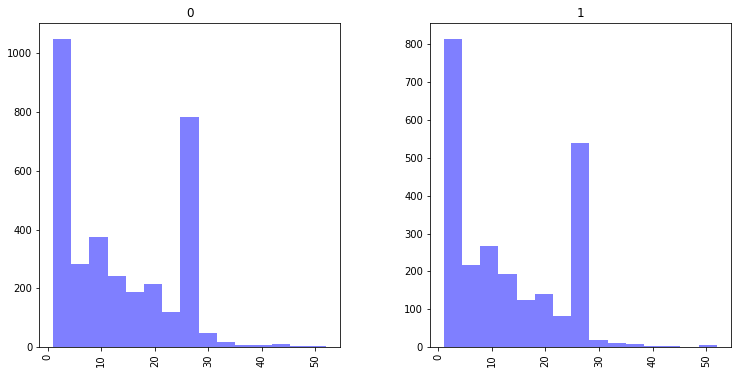

In [15]:
Penn['inuidur1'].hist(by=Penn['T2'],bins = 15, facecolor = 'blue', alpha=0.5, figsize = (12,6))
plt.show()

### 2.3 Runing all specifications

### First: Carry out covariate balance check

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

### 2.3.1. Classical 2-sample approach, no adjustment (CL)

In [17]:
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   abdt         5782 non-null   int64   
 1   tg           5782 non-null   int64   
 2   inuidur1     5782 non-null   int64   
 3   inuidur2     5782 non-null   int64   
 4   female       5782 non-null   int64   
 5   black        5782 non-null   int64   
 6   hispanic     5782 non-null   int64   
 7   othrace      5782 non-null   int64   
 8   dep          5782 non-null   category
 9   q1           5782 non-null   int64   
 10  q2           5782 non-null   int64   
 11  q3           5782 non-null   int64   
 12  q4           5782 non-null   int64   
 13  Unnamed: 13  5782 non-null   int64   
 14  q5           5782 non-null   int64   
 15  q6           5782 non-null   int64   
 16  recall       5782 non-null   int64   
 17  agelt35      5782 non-null   int64   
 18  agegt54      5782 non-null 

In [18]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

formula_cl = 'log_inuidur1 ~ T2'
ols_cl = smf.ols(formula = formula_cl, data = Penn).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())



                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Sat, 30 Apr 2022   Prob (F-statistic):             0.0154
Time:                        10:25:55   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

### 2.3.2. classical linear regression adjustment (CRA)

In [19]:
result = pyreadr.read_r('../../data/ols_cra_reg2.RData')
X_vars = result['X1']
ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")
# Results 
print(ols_cra.summary())
print( "Number of regressors in the interactive model:",len(ols_cra.params), '\n')



                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     84.52
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:56   Log-Likelihood:                -9180.6
No. Observations:                5782   AIC:                         1.857e+04
Df Residuals:                    5678   BIC:                         1.926e+04
Df Model:                         103                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              2.4472 

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  'rank is %d' % (J, J_), ValueWarning)


### 2.3.3. Interactive regression adjustment (IRA)

In [20]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [21]:
# Reset index to estimation
# Get data from R
result = pyreadr.read_r('../../data/ols_ira_reg2.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:25:56   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  'rank is %d' % (J, J_), ValueWarning)


### 2.3.4. Interactive regression adjustment (IRA) using Lasso.

In [22]:
import hdmpy

In [23]:
# Get data from R
result = pyreadr.read_r('../../data/rlasso_ira_reg2.RData')
X_vars = result['S']

In [24]:
X_vars

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
0,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
1,0.580076,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,0.764441,-0.223279,-0.263231,...,0.0,-0.042638,0.503228,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
2,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
3,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
4,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,-0.419924,0.599274,-0.118817,0.994811,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5778,0.580076,-0.400726,0.881183,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
5779,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,0.799896,-0.235559,-0.223279,-0.263231,...,-0.0,0.030866,-0.364292,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5780,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,0.561215,-0.016052,-0.031903,-0.016855,0.0


In [25]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])

In [26]:
# result.res is a object dictionary

result.res.keys()

dict_keys(['coefficients', 'se', 't', 'pval', 'lasso_regs', 'index', 'samplesize', 'residuals', 'coef_mat', 'selection_matrix'])

In [27]:
result.res['coefficients']

,0
T2,-0.074573


In [28]:
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074573,0.032104,-2.322841,0.020188


In [29]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["CL", "CRA", "IRA", "IRA Lasso"], \
                      index = ["estimate","standard error"])

table2

,CL,CRA,IRA,IRA Lasso
estimate,-0.078825,-0.071207,-0.069904,-0.074573
standard error,0.032509,0.032044,0.032076,0.032104


### 2.4. Ploting the coefficients

In [30]:
ols_ira.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.039     
Dependent Variable:    inuidur1            AIC:                   18664.2800
Date:                  2022-04-30 10:26    BIC:                   20016.7685
No. Observations:      5782                Log-Likelihood:        -9129.1   
Df Model:              202                 F-statistic:           35.02     
Df Residuals:          5579                Prob (F-statistic):    0.00      
R-squared:             0.073               Scale:                 1.4271    
----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
(Intercept)                   2.0557   0.0207 99.2430 0.0000  2.0151  2.0963
T2                           -0.0699   0.0321 -2.1793 0.0294 -0.1328 -0.0070
Xfemale                      -0.6663   0.4080 -1.6330 0.1025 -1.4662  0.1336
Xblack                       -0.8635   0.2969 -2.9079 0.0037 -1.4456 -0.2814
Xothrace                     -3.8177   0.9366 -4.0760 0.0000 -5.6538 -1.9815
Xfactor(dep)1                 0.0359   0.6477  0.0555 0.9558 -1.2338  1.3056
Xfactor(dep)2                 0.2118   0.4512  0.4693 0.6389 -0.6728  1.0963
Xq2                          -0.2546   0.4553 -0.5592 0.5760 -1.1473  0.6380
Xq3                          -0.6212   0.4550 -1.3655 0.1722 -1.5131  0.2707
Xq4                          -0.4799   0.4561 -1.0522 0.2928 -1.3741  0.4142
Xq5                          -0.3719   0.4539 -0.8193 0.4127 -1.2617  0.5179
Xq6                          -0.6770   0.4521 -1.4974 0.1343 -1.5634  0.2093
Xagelt35                     -0.6777   0.4094 -1.6555 0.0979 -1.4802  0.1248
Xagegt54                     -0.3041   0.7006 -0.4341 0.6643 -1.6776  1.0694
Xdurable                     -0.8380   0.5963 -1.4052 0.1600 -2.0071  0.3311
Xlusd                        -0.0995   0.2279 -0.4365 0.6625 -0.5463  0.3473
Xhusd                        -0.0626   0.2349 -0.2667 0.7897 -0.5232  0.3979
Xfemale:black                -0.2155   0.1505 -1.4317 0.1523 -0.5105  0.0796
Xfemale:othrace               0.5994   0.5626  1.0655 0.2867 -0.5034  1.7023
Xfemale:factor(dep)1         -0.1734   0.1419 -1.2223 0.2216 -0.4516  0.1047
Xfemale:factor(dep)2          0.2166   0.1263  1.7148 0.0864 -0.0310  0.4643
Xfemale:q2                    0.3919   0.4067  0.9636 0.3353 -0.4054  1.1891
Xfemale:q3                    0.6850   0.4063  1.6859 0.0919 -0.1116  1.4816
Xfemale:q4                    0.7214   0.4062  1.7761 0.0758 -0.0748  1.5176
Xfemale:q5                    0.5658   0.4048  1.3977 0.1623 -0.2278  1.3593
Xfemale:q6                    0.9082   0.4304  2.1100 0.0349  0.0644  1.7520
Xfemale:agelt35               0.1701   0.0951  1.7890 0.0737 -0.0163  0.3564
Xfemale:agegt54               0.2358   0.1601  1.4723 0.1410 -0.0782  0.5497
Xfemale:durable               0.0974   0.1376  0.7079 0.4791 -0.1724  0.3672
Xfemale:lusd                  0.0720   0.1065  0.6760 0.4991 -0.1368  0.2808
Xfemale:husd                  0.0610   0.1164  0.5236 0.6006 -0.1673  0.2892
Xblack:factor(dep)1           0.1090   0.2285  0.4771 0.6333 -0.3389  0.5569
Xblack:factor(dep)2          -0.2007   0.2285 -0.8785 0.3797 -0.6486  0.2472
Xblack:q2                     0.4267   0.3207  1.3306 0.1834 -0.2019  1.0553
Xblack:q3                     0.3299   0.3030  1.0890 0.2762 -0.2640  0.9239
Xblack:q4                     0.5443   0.3105  1.7529 0.0797 -0.0644  1.1531
Xblack:q5                     0.6597   0.3001  2.1985 0.0280  0.0714  1.2479
Xblack:agelt35                0.0830   0.1583  0.5241 0.6002 -0.2274  0.3934
Xblack:agegt54                0.4230   0.2547  1.6604 0.0969 -0.0764  0.9224
Xblack:durable                0.4681   0.2274  

In [31]:
err_series1 = ols_ira.params[104] - ols_ira.conf_int()[104,0]
coef_df1 = pd.DataFrame({'coef': ols_ira.params[104],
                        'err': err_series1,
                        'varname': ['T2*Female']
                      })
coef_df1

,coef,err,varname
0,-0.65975,1.078013,T2*Female


In [32]:
err_series2 = ols_ira.params[105] - ols_ira.conf_int()[105,0]
coef_df2 = pd.DataFrame({'coef': ols_ira.params[105],
                        'err': err_series2,
                        'varname': ['T2*Black']
                      })
coef_df2

,coef,err,varname
0,0.452557,1.000424,T2*Black


In [33]:
err_series3 = ols_ira.params[114] - ols_ira.conf_int()[114,0]
coef_df3 = pd.DataFrame({'coef': ols_ira.params[114],
                        'err': err_series3,
                        'varname': ['T2*agelt35']
                      })
coef_df3

,coef,err,varname
0,1.12332,1.24959,T2*agelt35


In [34]:
err_series4 = ols_ira.params[107] - ols_ira.conf_int()[107,0]
coef_df4 = pd.DataFrame({'coef': ols_ira.params[107],
                        'err': err_series4,
                        'varname': ['T2*factor(dep)1']
                      })
coef_df4

,coef,err,varname
0,0.763602,1.539785,T2*factor(dep)1


In [35]:
concat = pd.concat([coef_df1,coef_df2,coef_df3,coef_df4])
concat

,coef,err,varname
0,-0.659750,1.078013,T2*Female
0,0.452557,1.000424,T2*Black
0,1.123320,1.249590,T2*agelt35
0,0.763602,1.539785,T2*factor(dep)1


C:\Users\Victoria\anaconda3\envs\RStudio\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


Text(0.5, 1.0, 'Interval confidence')

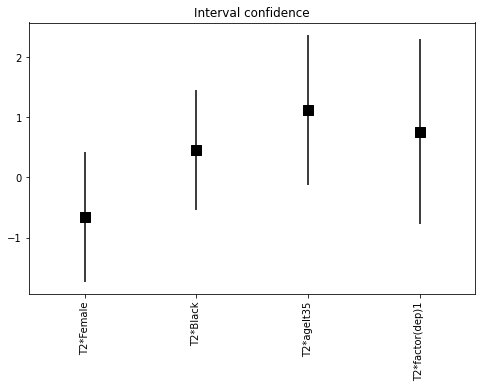

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
concat.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(concat.shape[0]), 
        marker='s', s=120, 
        y=concat['coef'], color='black')
plt.title('Interval confidence')

#### Interpretation
- On average, women who receive treatment reduce by 65% the weeks they are unemployed, unlike men who receive treatment.However, the coefficient is not significant.
- On average, Black people receiving treatment will spend 45% more weeks unemployed than non-Black people receiving treatment. However, the coefficient is not significant.
- On average, people who are older than 35 and receive treatment spend 112% more weeks unemployed, as opposed to people who are younger than 35 and receive treatment.
- On average, people who have one dependent and receive treatment remain unemployed 76% more weeks, as opposed to people who do not have one dependent (0, 2 or more) and receive treatment. However, the coefficient is not significant.
